In [1]:
#!pip install igraph
#!pip install cairocffi

In [1]:
import igraph
import bqplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable, get_cmap

## Example: Force-directed graph is not deterministic

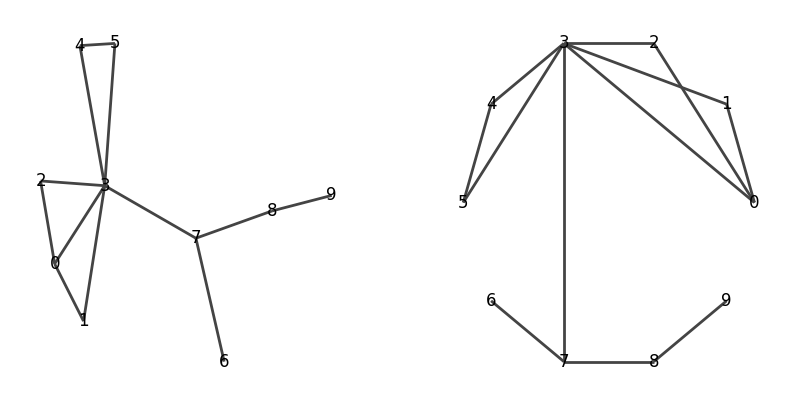

In [2]:
n_nodes = 10
edges = [[0, 1], [0, 2], [0, 3], [2, 3], [1, 3], [3, 4], [3, 5], [3, 7],
         [4, 5], [6, 7], [7, 8], [8, 9]]
network = igraph.Graph(n=n_nodes, edges=edges)
network.vs['name'] = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
igraph.plot(network,
            target=ax[0],
            layout='fr',  # a type of force-directed layout
            vertex_label=network.vs['name'],
            vertex_color=['lightblue', 'lightblue', 'lightblue', 'yellow', 'lightblue',
                          'lightblue', 'lightblue', 'yellow', 'lightblue', 'lightblue'],
            vertex_size=0.5)

# Compared to ring layout
igraph.plot(network,
            target=ax[1],
            layout='circle',
            vertex_label=network.vs['name'],
            vertex_color=['lightblue', 'lightblue', 'lightblue', 'yellow', 'lightblue',
                          'lightblue', 'lightblue', 'yellow', 'lightblue', 'lightblue'],
            vertex_size=0.5)

plt.show()

# Drawing a network using Bqplot

In [3]:
# Only nodes

# Node data
node_data = [
    {'label': 'Batman', 'shape': 'rect', 'is_villain': False},
    {'label': 'Superman', 'shape': 'rect', 'is_villain': False},
    {'label': 'Aquaman', 'shape': 'rect', 'is_villain': False},
    {'label': 'Joker', 'shape': 'circle', 'is_villain': True},
    {'label': 'Riddler', 'shape': 'circle', 'is_villain': True},
    {'label': 'Ivy', 'shape': 'circle',  'is_villain': True},

]

# network
dc_net = bqplot.Graph(node_data=node_data)


# Fig
fig = bqplot.Figure(marks=[dc_net])
fig

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, marks=[Graph(colors=['#1f77b4', '#ff7f0e…

In [4]:
# See what can be edited
dc_net.traits()

{'_model_module': <traitlets.traitlets.Unicode at 0x2a123fb4dc0>,
 '_model_module_version': <traitlets.traitlets.Unicode at 0x2a123fb4e50>,
 '_model_name': <traitlets.traitlets.Unicode at 0x2a123ff1690>,
 '_msg_callbacks': <traitlets.traitlets.Instance at 0x2a11ac8aa40>,
 '_property_lock': <traitlets.traitlets.Dict at 0x2a11ac8b0d0>,
 '_states_to_send': <traitlets.traitlets.Set at 0x2a11ac8ab00>,
 '_view_count': <traitlets.traitlets.Int at 0x2a11ac8a950>,
 '_view_module': <traitlets.traitlets.Unicode at 0x2a123fb4df0>,
 '_view_module_version': <traitlets.traitlets.Unicode at 0x2a123fb4e20>,
 '_view_name': <traitlets.traitlets.Unicode at 0x2a123ff16c0>,
 'apply_clip': <traitlets.traitlets.Bool at 0x2a123fb4a90>,
 'charge': <traitlets.traitlets.Int at 0x2a123ff1000>,
 'color': <traittypes.traittypes.Array at 0x2a123ff1450>,
 'colors': <traitlets.traitlets.List at 0x2a123ff1270>,
 'comm': <traitlets.traitlets.Any at 0x2a11ac8aaa0>,
 'directed': <traitlets.traitlets.Bool at 0x2a123ff1210>,

In [5]:
# Add edges between the good characters
edge_data = [
    {'source': 0, 'target': 1},
    {'source': 1, 'target': 2},
    {'source': 2, 'target': 0}
]

dc_net.link_data = edge_data

fig

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, marks=[Graph(colors=['#1f77b4', '#ff7f0e…

In [6]:
# make links as straight lines
dc_net.link_type = 'line'
fig

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, marks=[Graph(colors=['#1f77b4', '#ff7f0e…

In [7]:
# make graph as undirected
dc_net.directed = False
fig

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, marks=[Graph(colors=['#1f77b4', '#ff7f0e…

In [8]:
# Add tooltip
dc_net.tooltip = bqplot.Tooltip(fields=['is_villain'])

fig

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, marks=[Graph(colors=['#1f77b4', '#ff7f0e…

In [9]:
# Putting things together

# Nodes and edges
node_data = [
    {'label': 'Batman', 'shape': 'rect', 'is_villain': False},
    {'label': 'Superman', 'shape': 'rect', 'is_villain': False},
    {'label': 'Aquaman', 'shape': 'rect', 'is_villain': False},
    {'label': 'Joker', 'shape': 'circle', 'is_villain': True},
    {'label': 'Riddler', 'shape': 'circle', 'is_villain': True},
    {'label': 'Ivy', 'shape': 'circle',  'is_villain': True},

]
edge_data = [
    {'source': 0, 'target': 1},
    {'source': 1, 'target': 2},
    {'source': 2, 'target': 0}
]

# Network
dc_net = bqplot.Graph(node_data=node_data,
                      link_data=edge_data,
                      link_type='line',
                      directed=False,
                      tooltip=bqplot.Tooltip(fields=['is_villain']))


# Figure
fig = bqplot.Figure(marks=[dc_net])
fig

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, marks=[Graph(colors=['#1f77b4', '#ff7f0e…

# iGraph basics

In [10]:
# Construct a undirected network

edges = [[0, 1], [1, 2]]
n_nodes = 4

undirected_net = igraph.Graph(n=n_nodes, edges=edges, directed=False)
print(undirected_net)

IGRAPH U--- 4 2 --
+ edges:
0--1 1--2


In [11]:
# Construct a directed network

edges = [[0, 1], [1, 2]]
n_nodes = 4

directed_net = igraph.Graph(n=n_nodes, edges=edges, directed=True)
print(directed_net)

IGRAPH D--- 4 2 --
+ edges:
0->1 1->2


In [12]:
# Adjacency Matrix - Undirected
print(undirected_net.get_adjacency())

[[0, 1, 0, 0]
 [1, 0, 1, 0]
 [0, 1, 0, 0]
 [0, 0, 0, 0]]


In [13]:
# Adjacency Matrix - directed
print(directed_net.get_adjacency())

[[0, 1, 0, 0]
 [0, 0, 1, 0]
 [0, 0, 0, 0]
 [0, 0, 0, 0]]


In [14]:
# Add node
undirected_net.add_vertices(2)
print(undirected_net)

IGRAPH U--- 6 2 --
+ edges:
0--1 1--2


In [15]:
# Add edge
undirected_net.add_edges([[2, 3], [4, 5]])
print(undirected_net)

IGRAPH U--- 6 4 --
+ edges:
0--1 1--2 2--3 4--5


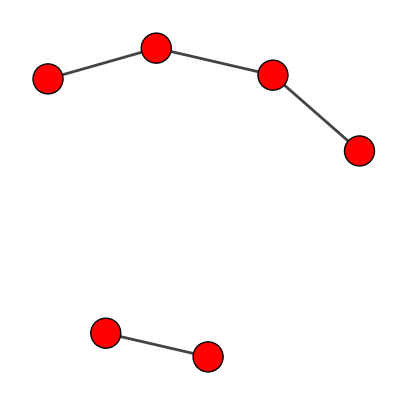

In [16]:
# Plot the network
fig, ax = plt.subplots(figsize=(5, 5))

igraph.plot(undirected_net,
            target=ax)
plt.show()

In [17]:
# Node and edge attributes. For example, get Node IDs
print(undirected_net.vs)
print(undirected_net.es)
print(undirected_net.vs.indices)

[0, 1, 2, 3, 4, 5]


In [18]:
# Add attributes
undirected_net.vs['is_villain'] = [False, False, False, True, True, True]
undirected_net.vs['name'] = ['batman', 'superman',
                             'aquaman', 'ivy', 'riddler', 'joker']

['green', 'green', 'green', 'red', 'red', 'red']
[0.8, 0.8, 0.8, 0.4, 0.4, 0.4]


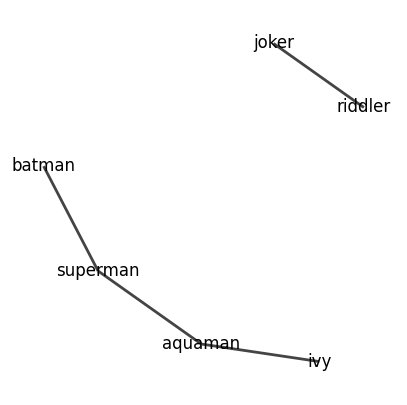

In [19]:
# Setting colors, size, etc by attributes

clrs = []
sizes = []
for is_villain in undirected_net.vs['is_villain']:
    if is_villain:
        clrs.append('red')
        sizes.append(0.4)
    else:
        clrs.append('green')
        sizes.append(0.8)

print(clrs)
print(sizes)

fig, ax = plt.subplots(figsize=(5, 5))
igraph.plot(undirected_net,
            target=ax,
            vertex_color=clrs,
            vertex_size=sizes,
            vertex_label=undirected_net.vs['name'])

plt.show()

# iGraph and Pandas

In [20]:
# Read the edge file
f = 'https://media.githubusercontent.com/media/TK-Hsiao/TK-Hsiao.github.io/master/data/coauthors.csv'

edge_list = pd.read_csv(f)
edge_list

,author_1,author_2,#collaborations
0,0,1,1
1,0,3,1
2,0,9,1
3,0,12,1
4,0,16,1
...,...,...,...
655,99,104,1
656,99,105,1
657,99,106,1
658,99,107,4


In [21]:
# Prep edge list for making the network

n_nodes = len(set(edge_list['author_1'].tolist() +
              edge_list['author_2'].tolist()))
edges = edge_list[['author_1', 'author_2']].values.tolist()
# print(edges)

coauthor_net = igraph.Graph(n=n_nodes, edges=edges, directed=False)
print(coauthor_net)

IGRAPH U--- 108 660 --
+ edges:
  0 --   1   3   9  12  16  17  20  25  36  41  49  50  52  53  54  55  63  68
69  74  77  81  82  90  93  99
  1 --   0   3   9  12  16  17  20  25  36  41  49  50  52  53  54  55  63  68
69  74  77  81  82  90  93  99
  2 --  76  99
  3 --   0   1   9  12  16  17  20  25  36  41  49  50  52  53  54  55  63  68
69  74  77  81  82  90  93  99
  4 --   6  14  27  28  38  57  64  67  75  86  97  99 100
  5 --  92  96  99
  6 --   4  14  27  28  38  57  64  67  75  86  97  99 100
  7 --  91  99
  8 --  99
  9 --   0   1   3  12  16  17  19  20  25  31  32  36  37  41  48  49  50  52
53  54  55  60  63  68  69  72  74  77  81  82  83  90  92  93  95  99
 10 --  44  66  99 102
 11 --  40  99
 12 --   0   1   3   9  16  17  20  25  36  41  49  50  52  53  54  55  63  68
69  74  77  81  82  90  93  99
 13 --  61  92  99
 14 --   4   6  27  28  38  57  64  67  75  86  97  99 100
 15 --  47  61  84  92  93  94  98  99 103
 16 --   0   1   3   9  12  17  20  25  3

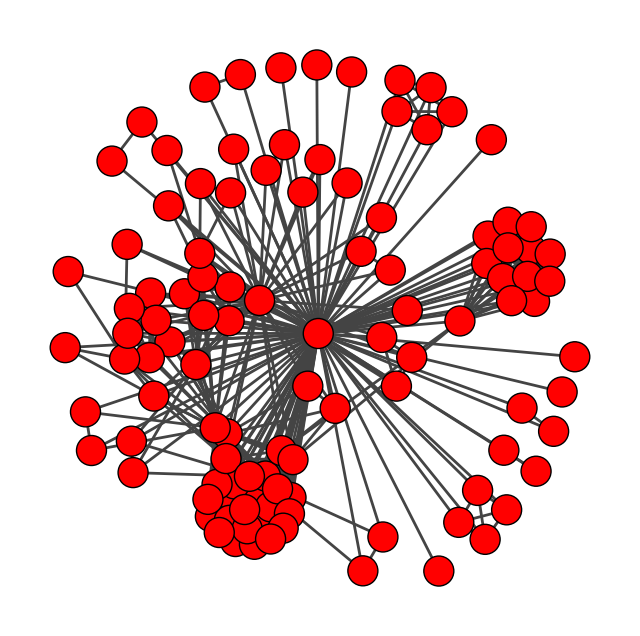

In [22]:
# Build a network
fig, ax = plt.subplots(figsize=(8, 8))
igraph.plot(coauthor_net,
            target=ax)

plt.show()

In [23]:
# Calculate degree and betweenness centrality

coauthor_net.vs['degree'] = coauthor_net.degree(mode='all')
coauthor_net.vs['betweenness'] = coauthor_net.betweenness(directed=False)

In [24]:
# Print the degree and the betweenness centrality values

print('Degree centrality:')
print(coauthor_net.vs['degree'])
print("Betweenness centrality:")
print(coauthor_net.vs['betweenness'])

Degree centrality:
[26, 26, 2, 26, 13, 3, 13, 2, 1, 36, 4, 2, 26, 3, 13, 9, 26, 26, 1, 7, 29, 3, 5, 4, 4, 26, 1, 13, 13, 3, 1, 8, 8, 5, 5, 2, 26, 8, 13, 4, 2, 26, 3, 3, 4, 4, 4, 9, 6, 30, 26, 2, 26, 26, 26, 26, 5, 15, 3, 2, 6, 10, 2, 26, 13, 4, 4, 13, 31, 26, 3, 1, 8, 1, 26, 13, 2, 26, 2, 3, 2, 30, 26, 8, 9, 8, 13, 2, 5, 4, 26, 2, 40, 38, 12, 8, 3, 13, 9, 107, 13, 1, 4, 12, 3, 2, 3, 3]
Betweenness centrality:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 98.09285714285716, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7000000000000002, 16.826190476190476, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 23.776190476190475, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 2.333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 60.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 23.776190476190475, 0.0, 0.0, 0.0, 5.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 307.73333333333335, 134

C:\Users\mujjabi2\AppData\Local\Temp\ipykernel_13224\3152006936.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('Oranges')


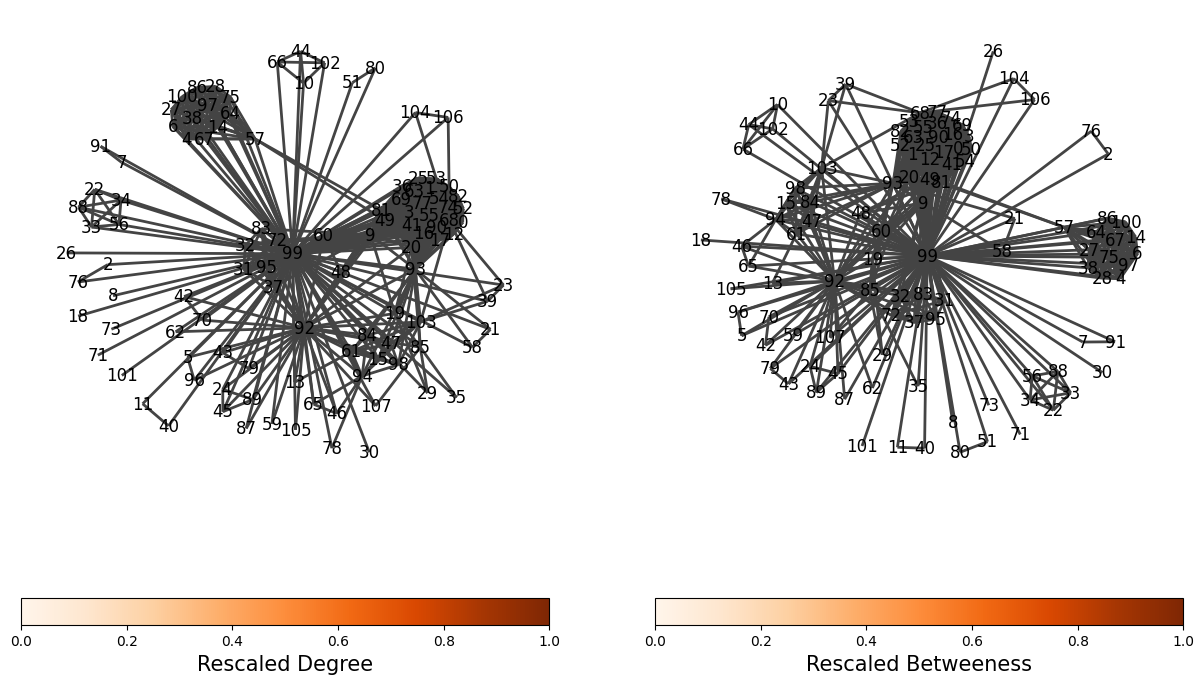

In [25]:
# Plot the network -- Compare the degree and the betweenness centrality of authors

# Prepare a color map
cmap = get_cmap('Oranges')

# Rescale degree and betweenness to be between 0.0 and 1.0
rescaled_degree = igraph.rescale(coauthor_net.vs['degree'])
rescaled_betweenness = igraph.rescale(coauthor_net.vs['betweenness'])

# Visualize the network

# Create two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 9))


# Plot the degree centrality
igraph.plot(coauthor_net,
            target=ax[0],
            vertex_color=[cmap(val) for val in rescaled_degree],
            vertex_label=coauthor_net.vs.indices,
            vertex_size=0.4)

# Plot the betwenness centrality
igraph.plot(coauthor_net,
            target=ax[1],
            vertex_color=[cmap(val) for val in rescaled_betweenness],
            vertex_label=coauthor_net.vs.indices,
            vertex_size=0.4)


# Add colorbars
cbar_1 = plt.colorbar(mappable=ScalarMappable(cmap=cmap),
                      orientation='horizontal', ax=ax[0])
cbar_1.set_label('Rescaled Degree', size=15)
cbar_2 = plt.colorbar(mappable=ScalarMappable(cmap=cmap),
                      orientation='horizontal', ax=ax[1])
cbar_2.set_label('Rescaled Betweeness', size=15)

plt.show()

## When we have an edge file and a node attributes file

In [26]:
# Read the edge file
edge_file = 'https://databank.illinois.edu/datafiles/5r2ds/download'

edge_list = pd.read_csv(edge_file)
edge_list

,citing_ID,cited_ID
0,1,26
1,1,42
2,1,38
3,1,32
4,1,29
...,...,...
164,14,49
165,14,53
166,14,82
167,14,61


In [29]:
# Read the nodes file
node_file = 'https://databank.illinois.edu/datafiles/1dvfq/download'

node_list = pd.read_csv(node_file)
node_list

,ID,year,Attitude,Type
0,1,2002,inconclusive,Systematic Review
1,2,2003,inconclusive,Systematic Review
2,3,2004,inconclusive,Systematic Review
3,4,2009,for,Systematic Review
4,5,2011,inconclusive,Systematic Review
...,...,...,...,...
77,89,2014,against,Primary Study Report
78,90,2014,for,Primary Study Report
79,91,2014,against,Primary Study Report
80,92,2014,against,Primary Study Report


In [30]:
# Generate nodes and edges from dataframe
nodes = node_list.to_dict('records')
edges = edge_list.to_dict('records')
print(nodes[:5])
print(edges[:5])

[{'ID': 1, 'year': 2002, 'Attitude': 'inconclusive', 'Type': 'Systematic Review'}, {'ID': 2, 'year': 2003, 'Attitude': 'inconclusive', 'Type': 'Systematic Review'}, {'ID': 3, 'year': 2004, 'Attitude': 'inconclusive', 'Type': 'Systematic Review'}, {'ID': 4, 'year': 2009, 'Attitude': 'for', 'Type': 'Systematic Review'}, {'ID': 5, 'year': 2011, 'Attitude': 'inconclusive', 'Type': 'Systematic Review'}]
[{'citing_ID': 1, 'cited_ID': 26}, {'citing_ID': 1, 'cited_ID': 42}, {'citing_ID': 1, 'cited_ID': 38}, {'citing_ID': 1, 'cited_ID': 32}, {'citing_ID': 1, 'cited_ID': 29}]


In [31]:
# Build a network
citation_net = igraph.Graph.DictList(vertices=nodes,
                                     edges=edges,
                                     vertex_name_attr='ID',
                                     edge_foreign_keys=(
                                         'citing_ID', 'cited_ID'),
                                     directed=True)
print(citation_net)

IGRAPH D--- 82 169 --
+ attr: Attitude (v), ID (v), Type (v), year (v), cited_ID (e), citing_ID (e)
+ edges:
0->14 0->30 0->26 0->20 0->17 1->17 1->14 1->20 1->26 1->30 1->31 2->17 2->14
2->20 2->26 2->30 2->31 3->15 3->19 3->21 3->27 3->33 3->35 3->37 3->40 3->41
3->43 3->46 3->49 3->47 4->26 4->20 4->48 4->30 4->31 4->43 4->14 4->39 5->39
5->36 5->31 5->43 5->14 5->26 5->30 5->20 6->46 6->49 6->61 6->70 6->18 6->41
6->37 6->21 6->58 6->19 6->35 6->33 7->21 7->40 7->47 7->43 7->57 7->41 7->33
7->15 7->46 7->37 7->62 7->65 7->27 7->35 7->49 8->15 8->20 8->21 8->26 8->27
8->33 8->35 8->37 8->40 8->41 8->43 8->44 8->57 8->46 8->47 8->49 8->62 8->65
9->36 9->38 9->48 9->51 9->52 9->63 10->40 10->47 10->69 10->46 10->37 10->65
10->54 10->49 10->67 10->53 10->72 10->68 10->58 10->62 10->43 10->44 10->57
10->75 10->56 10->59 10->51 10->48 10->52 10->41 10->63 11->17 11->20 11->26
11->39 11->42 11->55 11->71 12->56 12->68 12->67 12->57 12->69 12->62 12->64
12->60 12->65 12->34 12->54 12->44 1

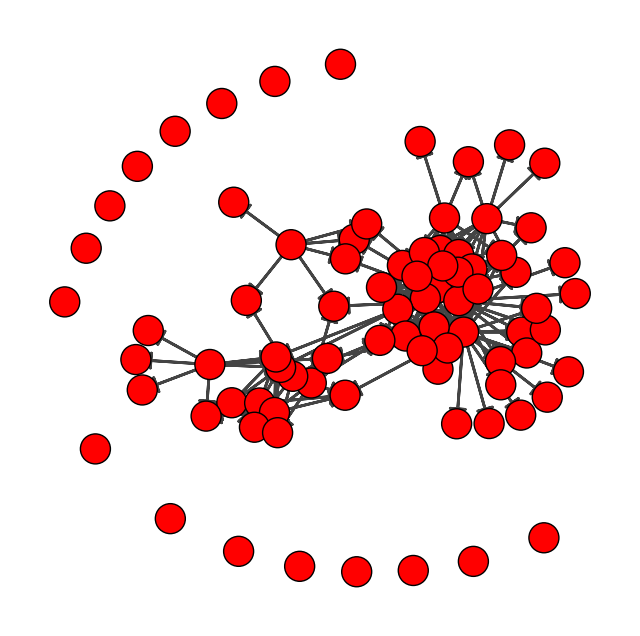

In [32]:
# Plot the net
fig, ax = plt.subplots(figsize=(8, 8))

igraph.plot(citation_net,
            target=ax,
            edge_arrow_size=0.03)

plt.show()

In [33]:
# Add node attributes
citation_net.vs['type'] = node_list['Type']
citation_net.vs['year'] = node_list['year']
citation_net.vs['attitude'] = node_list['Attitude']

{'Systematic Review', 'Primary Study Report'}


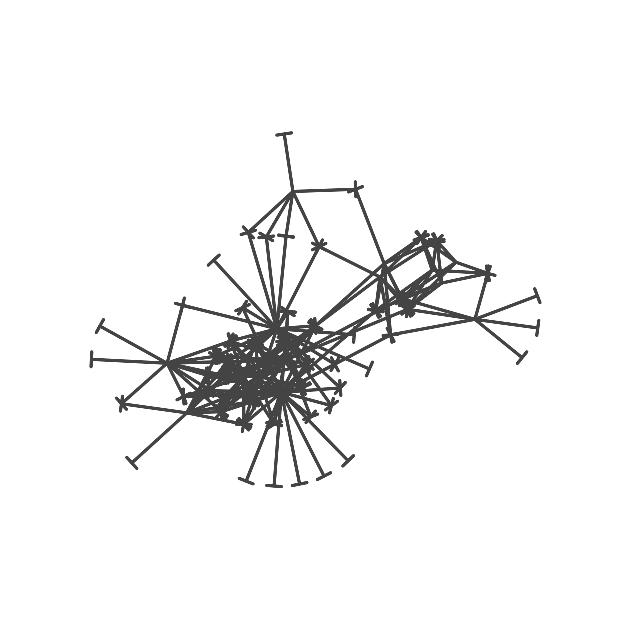

In [34]:
# Color by publication_type

# See what are the publication types
print(set(citation_net.vs['type']))

# Create node colors
clrs = []
for pub_type in citation_net.vs['type']:
    if pub_type == 'Systematic Review':
        clrs.append('red')
    else:
        clrs.append('yellow')


# Plot the network
fig, ax = plt.subplots(figsize=(8, 8))

igraph.plot(citation_net,
            target=ax,
            edge_arrow_size=0.03,
            vertex_color=clrs,
            vertex_size=0.4)

plt.show()

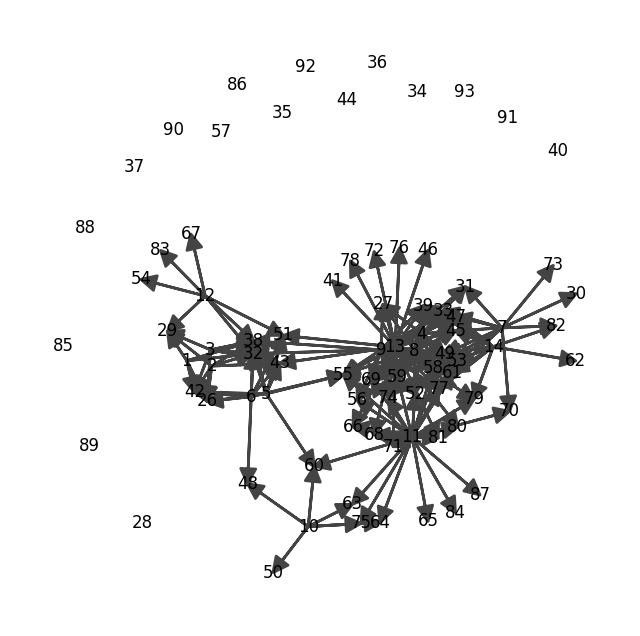

In [35]:
# Node size by ciation counts

# Set citation counts as a node attribute
citation_net.vs['citation_count'] = citation_net.degree(mode='in')


# Plot the network
fig, ax = plt.subplots(figsize=(8, 8))
igraph.plot(citation_net,
            target=ax,
            vertex_color=clrs,
            vertex_size=[np.log10(val+1)
                         for val in citation_net.vs['citation_count']],
            vertex_label=citation_net.vs['ID'])
plt.show()

# Get subgraph

In [36]:
# Select Nodes from the node file: Systematic reviews published in 2011

is_systematic_review = node_list['Type'] == 'Systematic Review'
published_in_2011 = node_list['year'] == 2011

selected_nodes = node_list.loc[(is_systematic_review) & (
    published_in_2011)]['ID'].tolist()
selected_nodes

[5, 6]

In [37]:
# Selected edges by the nodes' IDs
selected_edges = citation_net.es.select(citing_ID_in=selected_nodes)
for selected_edge in selected_edges:
    print(selected_edge)

igraph.Edge(<igraph.Graph object at 0x000002A127AE1640>, 30, {'citing_ID': 5, 'cited_ID': 38})
igraph.Edge(<igraph.Graph object at 0x000002A127AE1640>, 31, {'citing_ID': 5, 'cited_ID': 32})
igraph.Edge(<igraph.Graph object at 0x000002A127AE1640>, 32, {'citing_ID': 5, 'cited_ID': 60})
igraph.Edge(<igraph.Graph object at 0x000002A127AE1640>, 33, {'citing_ID': 5, 'cited_ID': 42})
igraph.Edge(<igraph.Graph object at 0x000002A127AE1640>, 34, {'citing_ID': 5, 'cited_ID': 43})
igraph.Edge(<igraph.Graph object at 0x000002A127AE1640>, 35, {'citing_ID': 5, 'cited_ID': 55})
igraph.Edge(<igraph.Graph object at 0x000002A127AE1640>, 36, {'citing_ID': 5, 'cited_ID': 26})
igraph.Edge(<igraph.Graph object at 0x000002A127AE1640>, 37, {'citing_ID': 5, 'cited_ID': 51})
igraph.Edge(<igraph.Graph object at 0x000002A127AE1640>, 38, {'citing_ID': 6, 'cited_ID': 51})
igraph.Edge(<igraph.Graph object at 0x000002A127AE1640>, 39, {'citing_ID': 6, 'cited_ID': 48})
igraph.Edge(<igraph.Graph object at 0x000002A127AE

In [38]:
# Get subgraph
sub_net = citation_net.subgraph_edges(selected_edges)
print(sub_net)

IGRAPH D--T 11 16 --
+ attr: Attitude (v), ID (v), Type (v), attitude (v), citation_count (v), type
  (v), year (v), cited_ID (e), citing_ID (e)
+ edges:
0->4 0->3 0->10 0->5 0->6 0->9 0->2 0->8 1->8 1->7 1->6 1->9 1->2 1->4 1->5
1->3


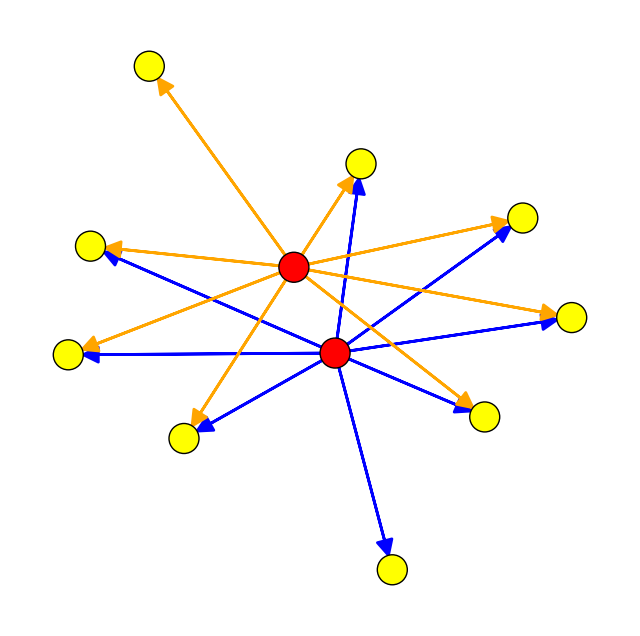

In [39]:
# Plot the subgraph

# Create colors for nodes
node_clrs = []
for pub_type in sub_net.vs['type']:
    if pub_type == 'Systematic Review':
        node_clrs.append('red')
    else:
        node_clrs.append('yellow')

# Create colors for edges
edge_clrs = []
for citing_id in sub_net.es['citing_ID']:
    if citing_id == 5:
        edge_clrs.append('blue')
    else:
        edge_clrs.append('orange')


# Plot the network
fig, ax = plt.subplots(figsize=(8, 8))
igraph.plot(sub_net,
            target=ax,
            vertex_color=node_clrs,
            edge_color=edge_clrs)
plt.show()